# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [158]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [159]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [160]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [161]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [162]:
x_train.shape

(160, 1)

In [163]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


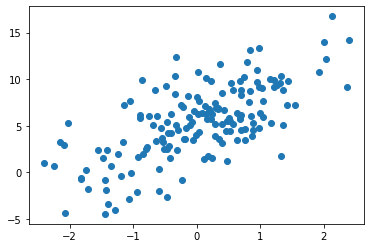

In [164]:
plt.scatter(x_train, y_train)

In [165]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [181]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 100



In [182]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_loss = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    criterion = torch.nn.MSELoss() 
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs = Variable(torch.from_numpy(x_train).cuda())
            labels = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs = Variable(torch.from_numpy(x_train))
            labels = Variable(torch.from_numpy(y_train))
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))
    train_loss.append(loss)

h: 2 | epoch: 0, loss: 41.8677864074707
h: 2 | epoch: 1, loss: 41.714542388916016
h: 2 | epoch: 2, loss: 41.561851501464844
h: 2 | epoch: 3, loss: 41.409690856933594
h: 2 | epoch: 4, loss: 41.25804138183594
h: 2 | epoch: 5, loss: 41.10686111450195
h: 2 | epoch: 6, loss: 40.95613479614258
h: 2 | epoch: 7, loss: 40.80583572387695
h: 2 | epoch: 8, loss: 40.655941009521484
h: 2 | epoch: 9, loss: 40.50643539428711
h: 2 | epoch: 10, loss: 40.35729217529297
h: 2 | epoch: 11, loss: 40.20847702026367
h: 2 | epoch: 12, loss: 40.05998229980469
h: 2 | epoch: 13, loss: 39.911781311035156
h: 2 | epoch: 14, loss: 39.76384353637695
h: 2 | epoch: 15, loss: 39.61616516113281
h: 2 | epoch: 16, loss: 39.468711853027344
h: 2 | epoch: 17, loss: 39.321468353271484
h: 2 | epoch: 18, loss: 39.17441940307617
h: 2 | epoch: 19, loss: 39.02753448486328
h: 2 | epoch: 20, loss: 38.88080596923828
h: 2 | epoch: 21, loss: 38.73420715332031
h: 2 | epoch: 22, loss: 38.58772277832031
h: 2 | epoch: 23, loss: 38.44133758544

h: 5 | epoch: 21, loss: 41.751068115234375
h: 5 | epoch: 22, loss: 41.46556091308594
h: 5 | epoch: 23, loss: 41.182090759277344
h: 5 | epoch: 24, loss: 40.900550842285156
h: 5 | epoch: 25, loss: 40.620845794677734
h: 5 | epoch: 26, loss: 40.342891693115234
h: 5 | epoch: 27, loss: 40.066585540771484
h: 5 | epoch: 28, loss: 39.7918586730957
h: 5 | epoch: 29, loss: 39.51861572265625
h: 5 | epoch: 30, loss: 39.24678421020508
h: 5 | epoch: 31, loss: 38.976287841796875
h: 5 | epoch: 32, loss: 38.707054138183594
h: 5 | epoch: 33, loss: 38.43901824951172
h: 5 | epoch: 34, loss: 38.17211151123047
h: 5 | epoch: 35, loss: 37.90627670288086
h: 5 | epoch: 36, loss: 37.641456604003906
h: 5 | epoch: 37, loss: 37.37757873535156
h: 5 | epoch: 38, loss: 37.11460494995117
h: 5 | epoch: 39, loss: 36.85247802734375
h: 5 | epoch: 40, loss: 36.591148376464844
h: 5 | epoch: 41, loss: 36.3305778503418
h: 5 | epoch: 42, loss: 36.070716857910156
h: 5 | epoch: 43, loss: 35.81153106689453
h: 5 | epoch: 44, loss: 3

h: 8 | epoch: 31, loss: 29.19070053100586
h: 8 | epoch: 32, loss: 28.85494613647461
h: 8 | epoch: 33, loss: 28.521900177001953
h: 8 | epoch: 34, loss: 28.19154930114746
h: 8 | epoch: 35, loss: 27.863882064819336
h: 8 | epoch: 36, loss: 27.538894653320312
h: 8 | epoch: 37, loss: 27.216562271118164
h: 8 | epoch: 38, loss: 26.896900177001953
h: 8 | epoch: 39, loss: 26.579898834228516
h: 8 | epoch: 40, loss: 26.26555824279785
h: 8 | epoch: 41, loss: 25.953882217407227
h: 8 | epoch: 42, loss: 25.644887924194336
h: 8 | epoch: 43, loss: 25.33856964111328
h: 8 | epoch: 44, loss: 25.034948348999023
h: 8 | epoch: 45, loss: 24.734033584594727
h: 8 | epoch: 46, loss: 24.43583869934082
h: 8 | epoch: 47, loss: 24.140382766723633
h: 8 | epoch: 48, loss: 23.847679138183594
h: 8 | epoch: 49, loss: 23.557748794555664
h: 8 | epoch: 50, loss: 23.270612716674805
h: 8 | epoch: 51, loss: 22.986286163330078
h: 8 | epoch: 52, loss: 22.70479965209961
h: 8 | epoch: 53, loss: 22.426170349121094
h: 8 | epoch: 54, 

h: 11 | epoch: 71, loss: 14.175088882446289
h: 11 | epoch: 72, loss: 13.98473834991455
h: 11 | epoch: 73, loss: 13.799542427062988
h: 11 | epoch: 74, loss: 13.619422912597656
h: 11 | epoch: 75, loss: 13.444299697875977
h: 11 | epoch: 76, loss: 13.27409553527832
h: 11 | epoch: 77, loss: 13.108723640441895
h: 11 | epoch: 78, loss: 12.948102951049805
h: 11 | epoch: 79, loss: 12.792150497436523
h: 11 | epoch: 80, loss: 12.640779495239258
h: 11 | epoch: 81, loss: 12.493904113769531
h: 11 | epoch: 82, loss: 12.351436614990234
h: 11 | epoch: 83, loss: 12.21329402923584
h: 11 | epoch: 84, loss: 12.07938289642334
h: 11 | epoch: 85, loss: 11.94961929321289
h: 11 | epoch: 86, loss: 11.823911666870117
h: 11 | epoch: 87, loss: 11.702176094055176
h: 11 | epoch: 88, loss: 11.584320068359375
h: 11 | epoch: 89, loss: 11.470257759094238
h: 11 | epoch: 90, loss: 11.359899520874023
h: 11 | epoch: 91, loss: 11.253157615661621
h: 11 | epoch: 92, loss: 11.149946212768555
h: 11 | epoch: 93, loss: 11.050175666

h: 15 | epoch: 12, loss: 32.33869934082031
h: 15 | epoch: 13, loss: 31.579357147216797
h: 15 | epoch: 14, loss: 30.840885162353516
h: 15 | epoch: 15, loss: 30.122650146484375
h: 15 | epoch: 16, loss: 29.424053192138672
h: 15 | epoch: 17, loss: 28.744552612304688
h: 15 | epoch: 18, loss: 28.0836181640625
h: 15 | epoch: 19, loss: 27.44075584411621
h: 15 | epoch: 20, loss: 26.81549072265625
h: 15 | epoch: 21, loss: 26.207386016845703
h: 15 | epoch: 22, loss: 25.61600685119629
h: 15 | epoch: 23, loss: 25.040956497192383
h: 15 | epoch: 24, loss: 24.481847763061523
h: 15 | epoch: 25, loss: 23.938308715820312
h: 15 | epoch: 26, loss: 23.409984588623047
h: 15 | epoch: 27, loss: 22.896526336669922
h: 15 | epoch: 28, loss: 22.397615432739258
h: 15 | epoch: 29, loss: 21.912919998168945
h: 15 | epoch: 30, loss: 21.442134857177734
h: 15 | epoch: 31, loss: 20.98495864868164
h: 15 | epoch: 32, loss: 20.541093826293945
h: 15 | epoch: 33, loss: 20.11025619506836
h: 15 | epoch: 34, loss: 19.692165374755

h: 18 | epoch: 29, loss: 24.665578842163086
h: 18 | epoch: 30, loss: 24.156993865966797
h: 18 | epoch: 31, loss: 23.660503387451172
h: 18 | epoch: 32, loss: 23.17593002319336
h: 18 | epoch: 33, loss: 22.703100204467773
h: 18 | epoch: 34, loss: 22.24184799194336
h: 18 | epoch: 35, loss: 21.79199981689453
h: 18 | epoch: 36, loss: 21.353404998779297
h: 18 | epoch: 37, loss: 20.925899505615234
h: 18 | epoch: 38, loss: 20.509321212768555
h: 18 | epoch: 39, loss: 20.103519439697266
h: 18 | epoch: 40, loss: 19.708332061767578
h: 18 | epoch: 41, loss: 19.323604583740234
h: 18 | epoch: 42, loss: 18.949180603027344
h: 18 | epoch: 43, loss: 18.584903717041016
h: 18 | epoch: 44, loss: 18.230619430541992
h: 18 | epoch: 45, loss: 17.88616943359375
h: 18 | epoch: 46, loss: 17.5513973236084
h: 18 | epoch: 47, loss: 17.22614097595215
h: 18 | epoch: 48, loss: 16.910245895385742
h: 18 | epoch: 49, loss: 16.60354995727539
h: 18 | epoch: 50, loss: 16.305892944335938
h: 18 | epoch: 51, loss: 16.017110824584

h: 21 | epoch: 42, loss: 17.421709060668945
h: 21 | epoch: 43, loss: 17.09845733642578
h: 21 | epoch: 44, loss: 16.78517723083496
h: 21 | epoch: 45, loss: 16.481639862060547
h: 21 | epoch: 46, loss: 16.187623977661133
h: 21 | epoch: 47, loss: 15.902902603149414
h: 21 | epoch: 48, loss: 15.627260208129883
h: 21 | epoch: 49, loss: 15.36047649383545
h: 21 | epoch: 50, loss: 15.102343559265137
h: 21 | epoch: 51, loss: 14.852648735046387
h: 21 | epoch: 52, loss: 14.611183166503906
h: 21 | epoch: 53, loss: 14.377741813659668
h: 21 | epoch: 54, loss: 14.152120590209961
h: 21 | epoch: 55, loss: 13.934123039245605
h: 21 | epoch: 56, loss: 13.723546028137207
h: 21 | epoch: 57, loss: 13.5201997756958
h: 21 | epoch: 58, loss: 13.323885917663574
h: 21 | epoch: 59, loss: 13.134417533874512
h: 21 | epoch: 60, loss: 12.951606750488281
h: 21 | epoch: 61, loss: 12.7752685546875
h: 21 | epoch: 62, loss: 12.605223655700684
h: 21 | epoch: 63, loss: 12.441287994384766
h: 21 | epoch: 64, loss: 12.28328895568

h: 24 | epoch: 68, loss: 11.592944145202637
h: 24 | epoch: 69, loss: 11.458540916442871
h: 24 | epoch: 70, loss: 11.329452514648438
h: 24 | epoch: 71, loss: 11.205503463745117
h: 24 | epoch: 72, loss: 11.086531639099121
h: 24 | epoch: 73, loss: 10.972369194030762
h: 24 | epoch: 74, loss: 10.862855911254883
h: 24 | epoch: 75, loss: 10.757832527160645
h: 24 | epoch: 76, loss: 10.657143592834473
h: 24 | epoch: 77, loss: 10.560640335083008
h: 24 | epoch: 78, loss: 10.468177795410156
h: 24 | epoch: 79, loss: 10.379606246948242
h: 24 | epoch: 80, loss: 10.29478931427002
h: 24 | epoch: 81, loss: 10.213589668273926
h: 24 | epoch: 82, loss: 10.135873794555664
h: 24 | epoch: 83, loss: 10.061511039733887
h: 24 | epoch: 84, loss: 9.990377426147461
h: 24 | epoch: 85, loss: 9.922348976135254
h: 24 | epoch: 86, loss: 9.857306480407715
h: 24 | epoch: 87, loss: 9.795134544372559
h: 24 | epoch: 88, loss: 9.735721588134766
h: 24 | epoch: 89, loss: 9.67895793914795
h: 24 | epoch: 90, loss: 9.6247386932373

h: 28 | epoch: 9, loss: 27.407739639282227
h: 28 | epoch: 10, loss: 26.473575592041016
h: 28 | epoch: 11, loss: 25.58243179321289
h: 28 | epoch: 12, loss: 24.732376098632812
h: 28 | epoch: 13, loss: 23.921573638916016
h: 28 | epoch: 14, loss: 23.148296356201172
h: 28 | epoch: 15, loss: 22.410903930664062
h: 28 | epoch: 16, loss: 21.70783042907715
h: 28 | epoch: 17, loss: 21.03759765625
h: 28 | epoch: 18, loss: 20.398784637451172
h: 28 | epoch: 19, loss: 19.790048599243164
h: 28 | epoch: 20, loss: 19.210092544555664
h: 28 | epoch: 21, loss: 18.65768814086914
h: 28 | epoch: 22, loss: 18.13164710998535
h: 28 | epoch: 23, loss: 17.630840301513672
h: 28 | epoch: 24, loss: 17.154186248779297
h: 28 | epoch: 25, loss: 16.700634002685547
h: 28 | epoch: 26, loss: 16.26918601989746
h: 28 | epoch: 27, loss: 15.858881950378418
h: 28 | epoch: 28, loss: 15.468792915344238
h: 28 | epoch: 29, loss: 15.09803295135498
h: 28 | epoch: 30, loss: 14.745748519897461
h: 28 | epoch: 31, loss: 14.41111946105957


h: 31 | epoch: 37, loss: 19.071727752685547
h: 31 | epoch: 38, loss: 18.655773162841797
h: 31 | epoch: 39, loss: 18.255348205566406
h: 31 | epoch: 40, loss: 17.869884490966797
h: 31 | epoch: 41, loss: 17.498842239379883
h: 31 | epoch: 42, loss: 17.141693115234375
h: 31 | epoch: 43, loss: 16.797941207885742
h: 31 | epoch: 44, loss: 16.467103958129883
h: 31 | epoch: 45, loss: 16.148719787597656
h: 31 | epoch: 46, loss: 15.842348098754883
h: 31 | epoch: 47, loss: 15.547558784484863
h: 31 | epoch: 48, loss: 15.263936042785645
h: 31 | epoch: 49, loss: 14.99109172821045
h: 31 | epoch: 50, loss: 14.7286376953125
h: 31 | epoch: 51, loss: 14.47620964050293
h: 31 | epoch: 52, loss: 14.233451843261719
h: 31 | epoch: 53, loss: 14.000017166137695
h: 31 | epoch: 54, loss: 13.775575637817383
h: 31 | epoch: 55, loss: 13.559808731079102
h: 31 | epoch: 56, loss: 13.35240650177002
h: 31 | epoch: 57, loss: 13.153071403503418
h: 31 | epoch: 58, loss: 12.961512565612793
h: 31 | epoch: 59, loss: 12.777451515

h: 34 | epoch: 38, loss: 14.016914367675781
h: 34 | epoch: 39, loss: 13.7247953414917
h: 34 | epoch: 40, loss: 13.447065353393555
h: 34 | epoch: 41, loss: 13.183097839355469
h: 34 | epoch: 42, loss: 12.932291984558105
h: 34 | epoch: 43, loss: 12.694066047668457
h: 34 | epoch: 44, loss: 12.467859268188477
h: 34 | epoch: 45, loss: 12.253133773803711
h: 34 | epoch: 46, loss: 12.04936695098877
h: 34 | epoch: 47, loss: 11.856061935424805
h: 34 | epoch: 48, loss: 11.672736167907715
h: 34 | epoch: 49, loss: 11.498927116394043
h: 34 | epoch: 50, loss: 11.334189414978027
h: 34 | epoch: 51, loss: 11.178096771240234
h: 34 | epoch: 52, loss: 11.030237197875977
h: 34 | epoch: 53, loss: 10.890216827392578
h: 34 | epoch: 54, loss: 10.757659912109375
h: 34 | epoch: 55, loss: 10.632200241088867
h: 34 | epoch: 56, loss: 10.5134916305542
h: 34 | epoch: 57, loss: 10.401204109191895
h: 34 | epoch: 58, loss: 10.295013427734375
h: 34 | epoch: 59, loss: 10.194618225097656
h: 34 | epoch: 60, loss: 10.099724769

h: 37 | epoch: 39, loss: 14.199419021606445
h: 37 | epoch: 40, loss: 13.909093856811523
h: 37 | epoch: 41, loss: 13.632548332214355
h: 37 | epoch: 42, loss: 13.369195938110352
h: 37 | epoch: 43, loss: 13.118474006652832
h: 37 | epoch: 44, loss: 12.879844665527344
h: 37 | epoch: 45, loss: 12.65278434753418
h: 37 | epoch: 46, loss: 12.436792373657227
h: 37 | epoch: 47, loss: 12.231385231018066
h: 37 | epoch: 48, loss: 12.036093711853027
h: 37 | epoch: 49, loss: 11.850476264953613
h: 37 | epoch: 50, loss: 11.67409610748291
h: 37 | epoch: 51, loss: 11.50654125213623
h: 37 | epoch: 52, loss: 11.347410202026367
h: 37 | epoch: 53, loss: 11.196321487426758
h: 37 | epoch: 54, loss: 11.05290412902832
h: 37 | epoch: 55, loss: 10.916808128356934
h: 37 | epoch: 56, loss: 10.787687301635742
h: 37 | epoch: 57, loss: 10.665220260620117
h: 37 | epoch: 58, loss: 10.549091339111328
h: 37 | epoch: 59, loss: 10.43899917602539
h: 37 | epoch: 60, loss: 10.334654808044434
h: 37 | epoch: 61, loss: 10.235784530

h: 40 | epoch: 33, loss: 16.529727935791016
h: 40 | epoch: 34, loss: 16.10898208618164
h: 40 | epoch: 35, loss: 15.708633422851562
h: 40 | epoch: 36, loss: 15.327807426452637
h: 40 | epoch: 37, loss: 14.96565055847168
h: 40 | epoch: 38, loss: 14.62135124206543
h: 40 | epoch: 39, loss: 14.2941255569458
h: 40 | epoch: 40, loss: 13.983221054077148
h: 40 | epoch: 41, loss: 13.687907218933105
h: 40 | epoch: 42, loss: 13.407491683959961
h: 40 | epoch: 43, loss: 13.1412992477417
h: 40 | epoch: 44, loss: 12.888687133789062
h: 40 | epoch: 45, loss: 12.64903450012207
h: 40 | epoch: 46, loss: 12.421743392944336
h: 40 | epoch: 47, loss: 12.206239700317383
h: 40 | epoch: 48, loss: 12.001972198486328
h: 40 | epoch: 49, loss: 11.808415412902832
h: 40 | epoch: 50, loss: 11.625056266784668
h: 40 | epoch: 51, loss: 11.451411247253418
h: 40 | epoch: 52, loss: 11.287012100219727
h: 40 | epoch: 53, loss: 11.131406784057617
h: 40 | epoch: 54, loss: 10.984169960021973
h: 40 | epoch: 55, loss: 10.844887733459

h: 43 | epoch: 66, loss: 9.121670722961426
h: 43 | epoch: 67, loss: 9.086856842041016
h: 43 | epoch: 68, loss: 9.054206848144531
h: 43 | epoch: 69, loss: 9.023590087890625
h: 43 | epoch: 70, loss: 8.994871139526367
h: 43 | epoch: 71, loss: 8.967938423156738
h: 43 | epoch: 72, loss: 8.94267463684082
h: 43 | epoch: 73, loss: 8.918977737426758
h: 43 | epoch: 74, loss: 8.896746635437012
h: 43 | epoch: 75, loss: 8.875892639160156
h: 43 | epoch: 76, loss: 8.856325149536133
h: 43 | epoch: 77, loss: 8.837965965270996
h: 43 | epoch: 78, loss: 8.820737838745117
h: 43 | epoch: 79, loss: 8.804571151733398
h: 43 | epoch: 80, loss: 8.789396286010742
h: 43 | epoch: 81, loss: 8.775154113769531
h: 43 | epoch: 82, loss: 8.761784553527832
h: 43 | epoch: 83, loss: 8.749232292175293
h: 43 | epoch: 84, loss: 8.737446784973145
h: 43 | epoch: 85, loss: 8.726381301879883
h: 43 | epoch: 86, loss: 8.715988159179688
h: 43 | epoch: 87, loss: 8.706226348876953
h: 43 | epoch: 88, loss: 8.697057723999023
h: 43 | epoc

h: 47 | epoch: 16, loss: 19.499469757080078
h: 47 | epoch: 17, loss: 18.700199127197266
h: 47 | epoch: 18, loss: 17.95670509338379
h: 47 | epoch: 19, loss: 17.265270233154297
h: 47 | epoch: 20, loss: 16.6224308013916
h: 47 | epoch: 21, loss: 16.024938583374023
h: 47 | epoch: 22, loss: 15.469762802124023
h: 47 | epoch: 23, loss: 14.954061508178711
h: 47 | epoch: 24, loss: 14.475179672241211
h: 47 | epoch: 25, loss: 14.03062915802002
h: 47 | epoch: 26, loss: 13.618077278137207
h: 47 | epoch: 27, loss: 13.235345840454102
h: 47 | epoch: 28, loss: 12.880389213562012
h: 47 | epoch: 29, loss: 12.55130386352539
h: 47 | epoch: 30, loss: 12.246298789978027
h: 47 | epoch: 31, loss: 11.963703155517578
h: 47 | epoch: 32, loss: 11.701951026916504
h: 47 | epoch: 33, loss: 11.459583282470703
h: 47 | epoch: 34, loss: 11.235231399536133
h: 47 | epoch: 35, loss: 11.027618408203125
h: 47 | epoch: 36, loss: 10.835556030273438
h: 47 | epoch: 37, loss: 10.657929420471191
h: 47 | epoch: 38, loss: 10.493700027

h: 50 | epoch: 49, loss: 9.817148208618164
h: 50 | epoch: 50, loss: 9.723893165588379
h: 50 | epoch: 51, loss: 9.637312889099121
h: 50 | epoch: 52, loss: 9.556951522827148
h: 50 | epoch: 53, loss: 9.482376098632812
h: 50 | epoch: 54, loss: 9.413187026977539
h: 50 | epoch: 55, loss: 9.349011421203613
h: 50 | epoch: 56, loss: 9.289497375488281
h: 50 | epoch: 57, loss: 9.2343168258667
h: 50 | epoch: 58, loss: 9.183165550231934
h: 50 | epoch: 59, loss: 9.135758399963379
h: 50 | epoch: 60, loss: 9.091828346252441
h: 50 | epoch: 61, loss: 9.051130294799805
h: 50 | epoch: 62, loss: 9.013431549072266
h: 50 | epoch: 63, loss: 8.978517532348633
h: 50 | epoch: 64, loss: 8.946187019348145
h: 50 | epoch: 65, loss: 8.916254043579102
h: 50 | epoch: 66, loss: 8.888545036315918
h: 50 | epoch: 67, loss: 8.862898826599121
h: 50 | epoch: 68, loss: 8.839166641235352
h: 50 | epoch: 69, loss: 8.817205429077148
h: 50 | epoch: 70, loss: 8.79688835144043
h: 50 | epoch: 71, loss: 8.778095245361328
h: 50 | epoch:

h: 53 | epoch: 80, loss: 8.636412620544434
h: 53 | epoch: 81, loss: 8.629734992980957
h: 53 | epoch: 82, loss: 8.623567581176758
h: 53 | epoch: 83, loss: 8.617875099182129
h: 53 | epoch: 84, loss: 8.61262035369873
h: 53 | epoch: 85, loss: 8.607769012451172
h: 53 | epoch: 86, loss: 8.603290557861328
h: 53 | epoch: 87, loss: 8.59915828704834
h: 53 | epoch: 88, loss: 8.595342636108398
h: 53 | epoch: 89, loss: 8.59182071685791
h: 53 | epoch: 90, loss: 8.588571548461914
h: 53 | epoch: 91, loss: 8.5855712890625
h: 53 | epoch: 92, loss: 8.582803726196289
h: 53 | epoch: 93, loss: 8.58024787902832
h: 53 | epoch: 94, loss: 8.577889442443848
h: 53 | epoch: 95, loss: 8.575712203979492
h: 53 | epoch: 96, loss: 8.57370376586914
h: 53 | epoch: 97, loss: 8.571849822998047
h: 53 | epoch: 98, loss: 8.570138931274414
h: 53 | epoch: 99, loss: 8.568559646606445
h: 54 | epoch: 0, loss: 48.659202575683594
h: 54 | epoch: 1, loss: 45.594417572021484
h: 54 | epoch: 2, loss: 42.76605987548828
h: 54 | epoch: 3, l

h: 56 | epoch: 97, loss: 8.568802833557129
h: 56 | epoch: 98, loss: 8.567281723022461
h: 56 | epoch: 99, loss: 8.565877914428711
h: 57 | epoch: 0, loss: 45.31707000732422
h: 57 | epoch: 1, loss: 42.4394416809082
h: 57 | epoch: 2, loss: 39.78721237182617
h: 57 | epoch: 3, loss: 37.341434478759766
h: 57 | epoch: 4, loss: 35.08510208129883
h: 57 | epoch: 5, loss: 33.00284957885742
h: 57 | epoch: 6, loss: 31.0808048248291
h: 57 | epoch: 7, loss: 29.306346893310547
h: 57 | epoch: 8, loss: 27.66799545288086
h: 57 | epoch: 9, loss: 26.1552734375
h: 57 | epoch: 10, loss: 24.758573532104492
h: 57 | epoch: 11, loss: 23.46909523010254
h: 57 | epoch: 12, loss: 22.278745651245117
h: 57 | epoch: 13, loss: 21.180078506469727
h: 57 | epoch: 14, loss: 20.166213989257812
h: 57 | epoch: 15, loss: 19.230810165405273
h: 57 | epoch: 16, loss: 18.368003845214844
h: 57 | epoch: 17, loss: 17.572362899780273
h: 57 | epoch: 18, loss: 16.8388614654541
h: 57 | epoch: 19, loss: 16.1628475189209
h: 57 | epoch: 20, l

h: 60 | epoch: 49, loss: 8.727368354797363
h: 60 | epoch: 50, loss: 8.710149765014648
h: 60 | epoch: 51, loss: 8.69461441040039
h: 60 | epoch: 52, loss: 8.680598258972168
h: 60 | epoch: 53, loss: 8.667952537536621
h: 60 | epoch: 54, loss: 8.656543731689453
h: 60 | epoch: 55, loss: 8.646247863769531
h: 60 | epoch: 56, loss: 8.636957168579102
h: 60 | epoch: 57, loss: 8.628570556640625
h: 60 | epoch: 58, loss: 8.621000289916992
h: 60 | epoch: 59, loss: 8.614168167114258
h: 60 | epoch: 60, loss: 8.607998847961426
h: 60 | epoch: 61, loss: 8.60242748260498
h: 60 | epoch: 62, loss: 8.597397804260254
h: 60 | epoch: 63, loss: 8.592852592468262
h: 60 | epoch: 64, loss: 8.58874797821045
h: 60 | epoch: 65, loss: 8.585041999816895
h: 60 | epoch: 66, loss: 8.581689834594727
h: 60 | epoch: 67, loss: 8.57866096496582
h: 60 | epoch: 68, loss: 8.57592487335205
h: 60 | epoch: 69, loss: 8.573451042175293
h: 60 | epoch: 70, loss: 8.571212768554688
h: 60 | epoch: 71, loss: 8.569189071655273
h: 60 | epoch: 7

h: 63 | epoch: 87, loss: 8.55316162109375
h: 63 | epoch: 88, loss: 8.552796363830566
h: 63 | epoch: 89, loss: 8.552468299865723
h: 63 | epoch: 90, loss: 8.552175521850586
h: 63 | epoch: 91, loss: 8.551910400390625
h: 63 | epoch: 92, loss: 8.551673889160156
h: 63 | epoch: 93, loss: 8.551462173461914
h: 63 | epoch: 94, loss: 8.551271438598633
h: 63 | epoch: 95, loss: 8.55109977722168
h: 63 | epoch: 96, loss: 8.550947189331055
h: 63 | epoch: 97, loss: 8.550808906555176
h: 63 | epoch: 98, loss: 8.550684928894043
h: 63 | epoch: 99, loss: 8.550573348999023
h: 64 | epoch: 0, loss: 47.4111442565918
h: 64 | epoch: 1, loss: 43.9683952331543
h: 64 | epoch: 2, loss: 40.835044860839844
h: 64 | epoch: 3, loss: 37.981285095214844
h: 64 | epoch: 4, loss: 35.380680084228516
h: 64 | epoch: 5, loss: 33.00968551635742
h: 64 | epoch: 6, loss: 30.84726333618164
h: 64 | epoch: 7, loss: 28.874521255493164
h: 64 | epoch: 8, loss: 27.074474334716797
h: 64 | epoch: 9, loss: 25.431806564331055
h: 64 | epoch: 10, 

h: 67 | epoch: 38, loss: 9.17358684539795
h: 67 | epoch: 39, loss: 9.110771179199219
h: 67 | epoch: 40, loss: 9.054232597351074
h: 67 | epoch: 41, loss: 9.003350257873535
h: 67 | epoch: 42, loss: 8.957565307617188
h: 67 | epoch: 43, loss: 8.916372299194336
h: 67 | epoch: 44, loss: 8.879315376281738
h: 67 | epoch: 45, loss: 8.845983505249023
h: 67 | epoch: 46, loss: 8.816003799438477
h: 67 | epoch: 47, loss: 8.789044380187988
h: 67 | epoch: 48, loss: 8.764801979064941
h: 67 | epoch: 49, loss: 8.74300479888916
h: 67 | epoch: 50, loss: 8.723407745361328
h: 67 | epoch: 51, loss: 8.705790519714355
h: 67 | epoch: 52, loss: 8.68995475769043
h: 67 | epoch: 53, loss: 8.67572021484375
h: 67 | epoch: 54, loss: 8.662925720214844
h: 67 | epoch: 55, loss: 8.651426315307617
h: 67 | epoch: 56, loss: 8.641092300415039
h: 67 | epoch: 57, loss: 8.631805419921875
h: 67 | epoch: 58, loss: 8.623458862304688
h: 67 | epoch: 59, loss: 8.615960121154785
h: 67 | epoch: 60, loss: 8.609221458435059
h: 67 | epoch: 

h: 70 | epoch: 90, loss: 8.55426025390625
h: 70 | epoch: 91, loss: 8.553838729858398
h: 70 | epoch: 92, loss: 8.553455352783203
h: 70 | epoch: 93, loss: 8.553106307983398
h: 70 | epoch: 94, loss: 8.552789688110352
h: 70 | epoch: 95, loss: 8.55250072479248
h: 70 | epoch: 96, loss: 8.552239418029785
h: 70 | epoch: 97, loss: 8.552000045776367
h: 70 | epoch: 98, loss: 8.551783561706543
h: 70 | epoch: 99, loss: 8.55158805847168
h: 71 | epoch: 0, loss: 48.56578826904297
h: 71 | epoch: 1, loss: 45.00782775878906
h: 71 | epoch: 2, loss: 41.77156448364258
h: 71 | epoch: 3, loss: 38.82564926147461
h: 71 | epoch: 4, loss: 36.142356872558594
h: 71 | epoch: 5, loss: 33.697021484375
h: 71 | epoch: 6, loss: 31.467647552490234
h: 71 | epoch: 7, loss: 29.434539794921875
h: 71 | epoch: 8, loss: 27.579998016357422
h: 71 | epoch: 9, loss: 25.888092041015625
h: 71 | epoch: 10, loss: 24.344417572021484
h: 71 | epoch: 11, loss: 22.93595314025879
h: 71 | epoch: 12, loss: 21.650875091552734
h: 71 | epoch: 13, 

h: 74 | epoch: 35, loss: 8.95035171508789
h: 74 | epoch: 36, loss: 8.900821685791016
h: 74 | epoch: 37, loss: 8.857380867004395
h: 74 | epoch: 38, loss: 8.819286346435547
h: 74 | epoch: 39, loss: 8.785883903503418
h: 74 | epoch: 40, loss: 8.75660228729248
h: 74 | epoch: 41, loss: 8.730934143066406
h: 74 | epoch: 42, loss: 8.708436965942383
h: 74 | epoch: 43, loss: 8.688720703125
h: 74 | epoch: 44, loss: 8.671442031860352
h: 74 | epoch: 45, loss: 8.656304359436035
h: 74 | epoch: 46, loss: 8.643041610717773
h: 74 | epoch: 47, loss: 8.631421089172363
h: 74 | epoch: 48, loss: 8.621243476867676
h: 74 | epoch: 49, loss: 8.61232852935791
h: 74 | epoch: 50, loss: 8.604519844055176
h: 74 | epoch: 51, loss: 8.597681045532227
h: 74 | epoch: 52, loss: 8.591691970825195
h: 74 | epoch: 53, loss: 8.586446762084961
h: 74 | epoch: 54, loss: 8.581853866577148
h: 74 | epoch: 55, loss: 8.57783317565918
h: 74 | epoch: 56, loss: 8.574312210083008
h: 74 | epoch: 57, loss: 8.571229934692383
h: 74 | epoch: 58,

h: 77 | epoch: 93, loss: 8.5503511428833
h: 77 | epoch: 94, loss: 8.550265312194824
h: 77 | epoch: 95, loss: 8.550189971923828
h: 77 | epoch: 96, loss: 8.55012321472168
h: 77 | epoch: 97, loss: 8.550063133239746
h: 77 | epoch: 98, loss: 8.550008773803711
h: 77 | epoch: 99, loss: 8.549962043762207
h: 78 | epoch: 0, loss: 41.556251525878906
h: 78 | epoch: 1, loss: 38.392738342285156
h: 78 | epoch: 2, loss: 35.5306282043457
h: 78 | epoch: 3, loss: 32.94026565551758
h: 78 | epoch: 4, loss: 30.595272064208984
h: 78 | epoch: 5, loss: 28.472082138061523
h: 78 | epoch: 6, loss: 26.54958724975586
h: 78 | epoch: 7, loss: 24.808828353881836
h: 78 | epoch: 8, loss: 23.23273277282715
h: 78 | epoch: 9, loss: 21.805904388427734
h: 78 | epoch: 10, loss: 20.514423370361328
h: 78 | epoch: 11, loss: 19.345693588256836
h: 78 | epoch: 12, loss: 18.288301467895508
h: 78 | epoch: 13, loss: 17.331897735595703
h: 78 | epoch: 14, loss: 16.46708106994629
h: 78 | epoch: 15, loss: 15.685320854187012
h: 78 | epoch:

h: 80 | epoch: 81, loss: 8.557165145874023
h: 80 | epoch: 82, loss: 8.55645751953125
h: 80 | epoch: 83, loss: 8.555818557739258
h: 80 | epoch: 84, loss: 8.555238723754883
h: 80 | epoch: 85, loss: 8.554713249206543
h: 80 | epoch: 86, loss: 8.554239273071289
h: 80 | epoch: 87, loss: 8.553808212280273
h: 80 | epoch: 88, loss: 8.553418159484863
h: 80 | epoch: 89, loss: 8.553064346313477
h: 80 | epoch: 90, loss: 8.552742958068848
h: 80 | epoch: 91, loss: 8.55245304107666
h: 80 | epoch: 92, loss: 8.552189826965332
h: 80 | epoch: 93, loss: 8.551949501037598
h: 80 | epoch: 94, loss: 8.551733016967773
h: 80 | epoch: 95, loss: 8.551536560058594
h: 80 | epoch: 96, loss: 8.551356315612793
h: 80 | epoch: 97, loss: 8.551194190979004
h: 80 | epoch: 98, loss: 8.551048278808594
h: 80 | epoch: 99, loss: 8.55091381072998
h: 81 | epoch: 0, loss: 42.928993225097656
h: 81 | epoch: 1, loss: 39.42435836791992
h: 81 | epoch: 2, loss: 36.277626037597656
h: 81 | epoch: 3, loss: 33.450870513916016
h: 81 | epoch: 

h: 84 | epoch: 46, loss: 8.67126750946045
h: 84 | epoch: 47, loss: 8.657060623168945
h: 84 | epoch: 48, loss: 8.644506454467773
h: 84 | epoch: 49, loss: 8.63341236114502
h: 84 | epoch: 50, loss: 8.623610496520996
h: 84 | epoch: 51, loss: 8.614952087402344
h: 84 | epoch: 52, loss: 8.60730266571045
h: 84 | epoch: 53, loss: 8.600545883178711
h: 84 | epoch: 54, loss: 8.59457778930664
h: 84 | epoch: 55, loss: 8.589306831359863
h: 84 | epoch: 56, loss: 8.5846529006958
h: 84 | epoch: 57, loss: 8.580541610717773
h: 84 | epoch: 58, loss: 8.576910972595215
h: 84 | epoch: 59, loss: 8.573705673217773
h: 84 | epoch: 60, loss: 8.570876121520996
h: 84 | epoch: 61, loss: 8.568376541137695
h: 84 | epoch: 62, loss: 8.566170692443848
h: 84 | epoch: 63, loss: 8.56422233581543
h: 84 | epoch: 64, loss: 8.56250286102295
h: 84 | epoch: 65, loss: 8.560985565185547
h: 84 | epoch: 66, loss: 8.55964469909668
h: 84 | epoch: 67, loss: 8.558463096618652
h: 84 | epoch: 68, loss: 8.557419776916504
h: 84 | epoch: 69, l

h: 87 | epoch: 89, loss: 8.549928665161133
h: 87 | epoch: 90, loss: 8.549882888793945
h: 87 | epoch: 91, loss: 8.549844741821289
h: 87 | epoch: 92, loss: 8.549811363220215
h: 87 | epoch: 93, loss: 8.549779891967773
h: 87 | epoch: 94, loss: 8.54975414276123
h: 87 | epoch: 95, loss: 8.549731254577637
h: 87 | epoch: 96, loss: 8.549712181091309
h: 87 | epoch: 97, loss: 8.54969596862793
h: 87 | epoch: 98, loss: 8.549678802490234
h: 87 | epoch: 99, loss: 8.549665451049805
h: 88 | epoch: 0, loss: 50.19814682006836
h: 88 | epoch: 1, loss: 45.597206115722656
h: 88 | epoch: 2, loss: 41.50730895996094
h: 88 | epoch: 3, loss: 37.86919403076172
h: 88 | epoch: 4, loss: 34.63127136230469
h: 88 | epoch: 5, loss: 31.74846839904785
h: 88 | epoch: 6, loss: 29.181222915649414
h: 88 | epoch: 7, loss: 26.894689559936523
h: 88 | epoch: 8, loss: 24.858097076416016
h: 88 | epoch: 9, loss: 23.044193267822266
h: 88 | epoch: 10, loss: 21.428794860839844
h: 88 | epoch: 11, loss: 19.990402221679688
h: 88 | epoch: 1

h: 91 | epoch: 9, loss: 17.589588165283203
h: 91 | epoch: 10, loss: 16.376976013183594
h: 91 | epoch: 11, loss: 15.324994087219238
h: 91 | epoch: 12, loss: 14.412663459777832
h: 91 | epoch: 13, loss: 13.621711730957031
h: 91 | epoch: 14, loss: 12.936223983764648
h: 91 | epoch: 15, loss: 12.342341423034668
h: 91 | epoch: 16, loss: 11.827999114990234
h: 91 | epoch: 17, loss: 11.3826904296875
h: 91 | epoch: 18, loss: 10.99728012084961
h: 91 | epoch: 19, loss: 10.66381549835205
h: 91 | epoch: 20, loss: 10.375384330749512
h: 91 | epoch: 21, loss: 10.12597942352295
h: 91 | epoch: 22, loss: 9.910379409790039
h: 91 | epoch: 23, loss: 9.724054336547852
h: 91 | epoch: 24, loss: 9.563069343566895
h: 91 | epoch: 25, loss: 9.424013137817383
h: 91 | epoch: 26, loss: 9.303924560546875
h: 91 | epoch: 27, loss: 9.200239181518555
h: 91 | epoch: 28, loss: 9.110734939575195
h: 91 | epoch: 29, loss: 9.033486366271973
h: 91 | epoch: 30, loss: 8.966826438903809
h: 91 | epoch: 31, loss: 8.90931510925293
h: 91

h: 94 | epoch: 17, loss: 11.976078987121582
h: 94 | epoch: 18, loss: 11.531139373779297
h: 94 | epoch: 19, loss: 11.143341064453125
h: 94 | epoch: 20, loss: 10.805456161499023
h: 94 | epoch: 21, loss: 10.511147499084473
h: 94 | epoch: 22, loss: 10.254873275756836
h: 94 | epoch: 23, loss: 10.031781196594238
h: 94 | epoch: 24, loss: 9.837628364562988
h: 94 | epoch: 25, loss: 9.668704986572266
h: 94 | epoch: 26, loss: 9.521769523620605
h: 94 | epoch: 27, loss: 9.393990516662598
h: 94 | epoch: 28, loss: 9.2828950881958
h: 94 | epoch: 29, loss: 9.186324119567871
h: 94 | epoch: 30, loss: 9.102398872375488
h: 94 | epoch: 31, loss: 9.029474258422852
h: 94 | epoch: 32, loss: 8.9661226272583
h: 94 | epoch: 33, loss: 8.911091804504395
h: 94 | epoch: 34, loss: 8.863301277160645
h: 94 | epoch: 35, loss: 8.821803092956543
h: 94 | epoch: 36, loss: 8.785772323608398
h: 94 | epoch: 37, loss: 8.754494667053223
h: 94 | epoch: 38, loss: 8.727346420288086
h: 94 | epoch: 39, loss: 8.70378303527832
h: 94 | e

h: 97 | epoch: 64, loss: 8.556560516357422
h: 97 | epoch: 65, loss: 8.555670738220215
h: 97 | epoch: 66, loss: 8.55489444732666
h: 97 | epoch: 67, loss: 8.554215431213379
h: 97 | epoch: 68, loss: 8.553625106811523
h: 97 | epoch: 69, loss: 8.553108215332031
h: 97 | epoch: 70, loss: 8.552657127380371
h: 97 | epoch: 71, loss: 8.552265167236328
h: 97 | epoch: 72, loss: 8.551921844482422
h: 97 | epoch: 73, loss: 8.55162239074707
h: 97 | epoch: 74, loss: 8.551362037658691
h: 97 | epoch: 75, loss: 8.551133155822754
h: 97 | epoch: 76, loss: 8.550935745239258
h: 97 | epoch: 77, loss: 8.550760269165039
h: 97 | epoch: 78, loss: 8.550610542297363
h: 97 | epoch: 79, loss: 8.550477027893066
h: 97 | epoch: 80, loss: 8.550361633300781
h: 97 | epoch: 81, loss: 8.550260543823242
h: 97 | epoch: 82, loss: 8.55017375946045
h: 97 | epoch: 83, loss: 8.55009651184082
h: 97 | epoch: 84, loss: 8.550029754638672
h: 97 | epoch: 85, loss: 8.549971580505371
h: 97 | epoch: 86, loss: 8.549921035766602
h: 97 | epoch: 

h: 101 | epoch: 22, loss: 9.587091445922852
h: 101 | epoch: 23, loss: 9.433451652526855
h: 101 | epoch: 24, loss: 9.302441596984863
h: 101 | epoch: 25, loss: 9.190752029418945
h: 101 | epoch: 26, loss: 9.095553398132324
h: 101 | epoch: 27, loss: 9.014429092407227
h: 101 | epoch: 28, loss: 8.94530963897705
h: 101 | epoch: 29, loss: 8.886427879333496
h: 101 | epoch: 30, loss: 8.836277961730957
h: 101 | epoch: 31, loss: 8.793571472167969
h: 101 | epoch: 32, loss: 8.757207870483398
h: 101 | epoch: 33, loss: 8.726247787475586
h: 101 | epoch: 34, loss: 8.699894905090332
h: 101 | epoch: 35, loss: 8.67746353149414
h: 101 | epoch: 36, loss: 8.65837287902832
h: 101 | epoch: 37, loss: 8.642126083374023
h: 101 | epoch: 38, loss: 8.628301620483398
h: 101 | epoch: 39, loss: 8.61653995513916
h: 101 | epoch: 40, loss: 8.60653305053711
h: 101 | epoch: 41, loss: 8.598017692565918
h: 101 | epoch: 42, loss: 8.590776443481445
h: 101 | epoch: 43, loss: 8.584615707397461
h: 101 | epoch: 44, loss: 8.579375267

h: 104 | epoch: 78, loss: 8.549610137939453
h: 104 | epoch: 79, loss: 8.549605369567871
h: 104 | epoch: 80, loss: 8.549600601196289
h: 104 | epoch: 81, loss: 8.549596786499023
h: 104 | epoch: 82, loss: 8.549592971801758
h: 104 | epoch: 83, loss: 8.549590110778809
h: 104 | epoch: 84, loss: 8.549588203430176
h: 104 | epoch: 85, loss: 8.549585342407227
h: 104 | epoch: 86, loss: 8.549583435058594
h: 104 | epoch: 87, loss: 8.549581527709961
h: 104 | epoch: 88, loss: 8.549581527709961
h: 104 | epoch: 89, loss: 8.549579620361328
h: 104 | epoch: 90, loss: 8.549577713012695
h: 104 | epoch: 91, loss: 8.549577713012695
h: 104 | epoch: 92, loss: 8.549577713012695
h: 104 | epoch: 93, loss: 8.549576759338379
h: 104 | epoch: 94, loss: 8.549576759338379
h: 104 | epoch: 95, loss: 8.549575805664062
h: 104 | epoch: 96, loss: 8.54957389831543
h: 104 | epoch: 97, loss: 8.54957389831543
h: 104 | epoch: 98, loss: 8.54957389831543
h: 104 | epoch: 99, loss: 8.54957389831543
h: 105 | epoch: 0, loss: 46.86558151

h: 107 | epoch: 98, loss: 8.549576759338379
h: 107 | epoch: 99, loss: 8.549576759338379
h: 108 | epoch: 0, loss: 43.79924774169922
h: 108 | epoch: 1, loss: 38.88563537597656
h: 108 | epoch: 2, loss: 34.655818939208984
h: 108 | epoch: 3, loss: 31.01315689086914
h: 108 | epoch: 4, loss: 27.875396728515625
h: 108 | epoch: 5, loss: 25.17230796813965
h: 108 | epoch: 6, loss: 22.84371566772461
h: 108 | epoch: 7, loss: 20.837947845458984
h: 108 | epoch: 8, loss: 19.11056900024414
h: 108 | epoch: 9, loss: 17.62327766418457
h: 108 | epoch: 10, loss: 16.343061447143555
h: 108 | epoch: 11, loss: 15.241429328918457
h: 108 | epoch: 12, loss: 14.293769836425781
h: 108 | epoch: 13, loss: 13.478848457336426
h: 108 | epoch: 14, loss: 12.77830982208252
h: 108 | epoch: 15, loss: 12.176309585571289
h: 108 | epoch: 16, loss: 11.65916633605957
h: 108 | epoch: 17, loss: 11.215070724487305
h: 108 | epoch: 18, loss: 10.833829879760742
h: 108 | epoch: 19, loss: 10.506650924682617
h: 108 | epoch: 20, loss: 10.22

h: 111 | epoch: 39, loss: 8.63319206237793
h: 111 | epoch: 40, loss: 8.621072769165039
h: 111 | epoch: 41, loss: 8.61070728302002
h: 111 | epoch: 42, loss: 8.60184097290039
h: 111 | epoch: 43, loss: 8.594258308410645
h: 111 | epoch: 44, loss: 8.587774276733398
h: 111 | epoch: 45, loss: 8.582229614257812
h: 111 | epoch: 46, loss: 8.577488899230957
h: 111 | epoch: 47, loss: 8.573434829711914
h: 111 | epoch: 48, loss: 8.56997013092041
h: 111 | epoch: 49, loss: 8.567007064819336
h: 111 | epoch: 50, loss: 8.564474105834961
h: 111 | epoch: 51, loss: 8.562307357788086
h: 111 | epoch: 52, loss: 8.560456275939941
h: 111 | epoch: 53, loss: 8.558874130249023
h: 111 | epoch: 54, loss: 8.557523727416992
h: 111 | epoch: 55, loss: 8.556366920471191
h: 111 | epoch: 56, loss: 8.555378913879395
h: 111 | epoch: 57, loss: 8.554534912109375
h: 111 | epoch: 58, loss: 8.553812026977539
h: 111 | epoch: 59, loss: 8.553196907043457
h: 111 | epoch: 60, loss: 8.552668571472168
h: 111 | epoch: 61, loss: 8.55222034

h: 114 | epoch: 77, loss: 8.549676895141602
h: 114 | epoch: 78, loss: 8.549661636352539
h: 114 | epoch: 79, loss: 8.549650192260742
h: 114 | epoch: 80, loss: 8.549638748168945
h: 114 | epoch: 81, loss: 8.549631118774414
h: 114 | epoch: 82, loss: 8.549622535705566
h: 114 | epoch: 83, loss: 8.549615859985352
h: 114 | epoch: 84, loss: 8.54961109161377
h: 114 | epoch: 85, loss: 8.549604415893555
h: 114 | epoch: 86, loss: 8.549600601196289
h: 114 | epoch: 87, loss: 8.549595832824707
h: 114 | epoch: 88, loss: 8.549593925476074
h: 114 | epoch: 89, loss: 8.549590110778809
h: 114 | epoch: 90, loss: 8.549588203430176
h: 114 | epoch: 91, loss: 8.549586296081543
h: 114 | epoch: 92, loss: 8.54958438873291
h: 114 | epoch: 93, loss: 8.549582481384277
h: 114 | epoch: 94, loss: 8.549581527709961
h: 114 | epoch: 95, loss: 8.549580574035645
h: 114 | epoch: 96, loss: 8.549577713012695
h: 114 | epoch: 97, loss: 8.549577713012695
h: 114 | epoch: 98, loss: 8.549577713012695
h: 114 | epoch: 99, loss: 8.549577

h: 117 | epoch: 92, loss: 8.54957389831543
h: 117 | epoch: 93, loss: 8.54957389831543
h: 117 | epoch: 94, loss: 8.54957389831543
h: 117 | epoch: 95, loss: 8.54957389831543
h: 117 | epoch: 96, loss: 8.549572944641113
h: 117 | epoch: 97, loss: 8.54957389831543
h: 117 | epoch: 98, loss: 8.549572944641113
h: 117 | epoch: 99, loss: 8.549572944641113
h: 118 | epoch: 0, loss: 56.50958251953125
h: 118 | epoch: 1, loss: 47.773414611816406
h: 118 | epoch: 2, loss: 40.635101318359375
h: 118 | epoch: 3, loss: 34.797332763671875
h: 118 | epoch: 4, loss: 30.020565032958984
h: 118 | epoch: 5, loss: 26.110820770263672
h: 118 | epoch: 6, loss: 22.91037368774414
h: 118 | epoch: 7, loss: 20.290632247924805
h: 118 | epoch: 8, loss: 18.14651870727539
h: 118 | epoch: 9, loss: 16.39203643798828
h: 118 | epoch: 10, loss: 14.95673942565918
h: 118 | epoch: 11, loss: 13.782890319824219
h: 118 | epoch: 12, loss: 12.823145866394043
h: 118 | epoch: 13, loss: 12.038683891296387
h: 118 | epoch: 14, loss: 11.397683143

h: 120 | epoch: 97, loss: 8.54957389831543
h: 120 | epoch: 98, loss: 8.549572944641113
h: 120 | epoch: 99, loss: 8.549572944641113
h: 121 | epoch: 0, loss: 46.794437408447266
h: 121 | epoch: 1, loss: 41.02531433105469
h: 121 | epoch: 2, loss: 36.1341438293457
h: 121 | epoch: 3, loss: 31.984167098999023
h: 121 | epoch: 4, loss: 28.461090087890625
h: 121 | epoch: 5, loss: 25.46901512145996
h: 121 | epoch: 6, loss: 22.927215576171875
h: 121 | epoch: 7, loss: 20.76754379272461
h: 121 | epoch: 8, loss: 18.932363510131836
h: 121 | epoch: 9, loss: 17.372844696044922
h: 121 | epoch: 10, loss: 16.04757308959961
h: 121 | epoch: 11, loss: 14.921379089355469
h: 121 | epoch: 12, loss: 13.964396476745605
h: 121 | epoch: 13, loss: 13.151232719421387
h: 121 | epoch: 14, loss: 12.460306167602539
h: 121 | epoch: 15, loss: 11.873268127441406
h: 121 | epoch: 16, loss: 11.374512672424316
h: 121 | epoch: 17, loss: 10.950773239135742
h: 121 | epoch: 18, loss: 10.590770721435547
h: 121 | epoch: 19, loss: 10.2

h: 123 | epoch: 73, loss: 8.549795150756836
h: 123 | epoch: 74, loss: 8.549764633178711
h: 123 | epoch: 75, loss: 8.549738883972168
h: 123 | epoch: 76, loss: 8.549715995788574
h: 123 | epoch: 77, loss: 8.549696922302246
h: 123 | epoch: 78, loss: 8.549680709838867
h: 123 | epoch: 79, loss: 8.549665451049805
h: 123 | epoch: 80, loss: 8.549654006958008
h: 123 | epoch: 81, loss: 8.549642562866211
h: 123 | epoch: 82, loss: 8.549633026123047
h: 123 | epoch: 83, loss: 8.5496244430542
h: 123 | epoch: 84, loss: 8.549616813659668
h: 123 | epoch: 85, loss: 8.549612045288086
h: 123 | epoch: 86, loss: 8.549607276916504
h: 123 | epoch: 87, loss: 8.549601554870605
h: 123 | epoch: 88, loss: 8.549598693847656
h: 123 | epoch: 89, loss: 8.54959487915039
h: 123 | epoch: 90, loss: 8.549592018127441
h: 123 | epoch: 91, loss: 8.549589157104492
h: 123 | epoch: 92, loss: 8.549586296081543
h: 123 | epoch: 93, loss: 8.549585342407227
h: 123 | epoch: 94, loss: 8.549583435058594
h: 123 | epoch: 95, loss: 8.5495815

h: 126 | epoch: 82, loss: 8.549601554870605
h: 126 | epoch: 83, loss: 8.549596786499023
h: 126 | epoch: 84, loss: 8.549592971801758
h: 126 | epoch: 85, loss: 8.549591064453125
h: 126 | epoch: 86, loss: 8.54958724975586
h: 126 | epoch: 87, loss: 8.549586296081543
h: 126 | epoch: 88, loss: 8.549583435058594
h: 126 | epoch: 89, loss: 8.549581527709961
h: 126 | epoch: 90, loss: 8.549581527709961
h: 126 | epoch: 91, loss: 8.549580574035645
h: 126 | epoch: 92, loss: 8.549579620361328
h: 126 | epoch: 93, loss: 8.549577713012695
h: 126 | epoch: 94, loss: 8.549577713012695
h: 126 | epoch: 95, loss: 8.549575805664062
h: 126 | epoch: 96, loss: 8.549575805664062
h: 126 | epoch: 97, loss: 8.549574851989746
h: 126 | epoch: 98, loss: 8.549574851989746
h: 126 | epoch: 99, loss: 8.549574851989746
h: 127 | epoch: 0, loss: 41.28313064575195
h: 127 | epoch: 1, loss: 36.177001953125
h: 127 | epoch: 2, loss: 31.8657169342041
h: 127 | epoch: 3, loss: 28.224380493164062
h: 127 | epoch: 4, loss: 25.14843368530

In [183]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.753723  ]
 [ 3.1922226 ]
 [ 4.0465965 ]
 [ 5.925692  ]
 [ 7.974814  ]
 [ 0.6915566 ]
 [ 8.885368  ]
 [ 4.9859595 ]
 [ 6.3820505 ]
 [ 6.765657  ]
 [ 3.469378  ]
 [ 3.3046637 ]
 [ 7.5896564 ]
 [ 3.9315305 ]
 [ 4.751453  ]
 [ 3.1397958 ]
 [ 7.976791  ]
 [ 9.186981  ]
 [ 7.014275  ]
 [ 4.033852  ]
 [ 1.525964  ]
 [ 0.40423748]
 [ 5.6519923 ]
 [ 3.5421176 ]
 [ 1.1342697 ]
 [ 4.0500765 ]
 [ 4.712211  ]
 [ 8.1417    ]
 [ 5.161717  ]
 [ 7.043617  ]
 [ 1.3336922 ]
 [ 6.2181478 ]
 [ 5.6454    ]
 [ 8.624482  ]
 [ 2.890283  ]
 [ 2.9916    ]
 [-0.1477088 ]
 [ 8.4954    ]
 [ 7.467823  ]
 [ 6.675952  ]
 [ 7.2092195 ]
 [ 6.7426963 ]
 [ 5.896728  ]
 [ 6.563708  ]
 [ 7.1406984 ]
 [ 7.6492286 ]
 [-0.4898591 ]
 [ 7.3396363 ]
 [ 8.108897  ]
 [ 4.0967035 ]
 [ 5.928333  ]
 [ 3.0167933 ]
 [-0.29290038]
 [ 6.410723  ]
 [10.741347  ]
 [ 2.9184918 ]
 [ 6.2975144 ]
 [ 4.6435294 ]
 [ 8.999893  ]
 [ 7.2136908 ]
 [ 0.40025988]
 [ 5.530725  ]
 [ 7.587857  ]
 [ 4.4136176 ]
 [ 6.378987  ]
 [ 4.879454  ]
 [ 5.35736

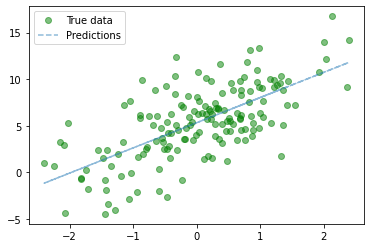

In [184]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

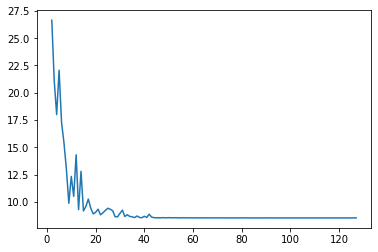

In [185]:
plt.plot(hs, train_loss)

In [94]:
hs

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 1

In [96]:
train_loss

[tensor(32.7572, grad_fn=<MseLossBackward>),
 tensor(17.6923, grad_fn=<MseLossBackward>),
 tensor(16.8453, grad_fn=<MseLossBackward>),
 tensor(30.7152, grad_fn=<MseLossBackward>),
 tensor(12.0260, grad_fn=<MseLossBackward>),
 tensor(11.3078, grad_fn=<MseLossBackward>),
 tensor(13.8895, grad_fn=<MseLossBackward>),
 tensor(12.5937, grad_fn=<MseLossBackward>),
 tensor(12.4539, grad_fn=<MseLossBackward>),
 tensor(12.6788, grad_fn=<MseLossBackward>),
 tensor(11.2182, grad_fn=<MseLossBackward>),
 tensor(19.7864, grad_fn=<MseLossBackward>),
 tensor(9.2432, grad_fn=<MseLossBackward>),
 tensor(11.2767, grad_fn=<MseLossBackward>),
 tensor(8.7766, grad_fn=<MseLossBackward>),
 tensor(9.6972, grad_fn=<MseLossBackward>),
 tensor(9.1315, grad_fn=<MseLossBackward>),
 tensor(10.0355, grad_fn=<MseLossBackward>),
 tensor(9.2087, grad_fn=<MseLossBackward>),
 tensor(8.8636, grad_fn=<MseLossBackward>),
 tensor(10.1902, grad_fn=<MseLossBackward>),
 tensor(9.1639, grad_fn=<MseLossBackward>),
 tensor(8.7912, g

In [ ]:
model = NN(inputDim, hidden_sizes, outputDim)
if torch.cuda.is_available():
    model.cuda()
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
test_losses = []